In [1]:
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Dense, GRU, Conv1D, MaxPooling1D, Flatten

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Executive

In [3]:
# re-reading the stock_data into pandas dataframe
stock_data = pd.read_csv('/content/drive/MyDrive/JU PROJ/TSLA FinBERT/EXEC_FINBERT_Tesla_stock_data.csv', index_col = False)

# renaming the column
stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)
stock_data

,Date,Close,negative,neutral,positive,Open,High,Low,Volume
0,2017-01-03,43.397999,0.157270,0.207310,0.635420,42.972000,44.066002,42.192001,29616500
1,2017-01-04,45.397999,0.203407,0.163813,0.632780,42.950001,45.599998,42.862000,56067500
2,2017-01-05,45.349998,0.086530,0.112679,0.800792,45.284000,45.495998,44.389999,29558500
3,2017-01-06,45.801998,NaN,NaN,NaN,45.386002,46.062000,45.090000,27639500
4,2017-01-09,46.256001,NaN,NaN,NaN,45.793999,46.383999,45.599998,19897500
...,...,...,...,...,...,...,...,...,...
1341,2022-05-02,902.940002,NaN,NaN,NaN,860.770020,906.359985,848.030029,25260500
1342,2022-05-03,909.250000,NaN,NaN,NaN,903.179993,924.080017,888.590027,21236500
1343,2022-05-04,952.619995,NaN,NaN,NaN,903.940002,955.500000,885.280029,27214600
1344,2022-05-05,873.280029,0.105465,0.225527,0.669008,939.020020,945.599976,857.700012,30839700


In [4]:
date = []
for i in range(0,1346):
  if np.isnan(stock_data.positive[i]):
    date.append(stock_data.Date[i])
print(date)

['2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13', '2017-01-18', '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25', '2017-01-30', '2017-01-31', '2017-02-02', '2017-02-03', '2017-02-07', '2017-02-08', '2017-02-09', '2017-02-21', '2017-02-28', '2017-03-03', '2017-03-06', '2017-03-10', '2017-03-13', '2017-03-21', '2017-03-22', '2017-03-23', '2017-03-27', '2017-03-31', '2017-04-06', '2017-04-12', '2017-04-17', '2017-04-18', '2017-04-19', '2017-04-21', '2017-04-24', '2017-04-26', '2017-04-27', '2017-04-28', '2017-05-12', '2017-05-16', '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-22', '2017-05-24', '2017-05-25', '2017-05-26', '2017-05-31', '2017-06-05', '2017-06-09', '2017-06-12', '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-19', '2017-06-20', '2017-06-28', '2017-06-29', '2017-06-30', '2017-07-11', '2017-07-12', '2017-07-13', '2017-07-14', '2017-07-18', '2017-07-19', '2017-07-20', '2017-07-21', '2017-07-24', '2017-07-25', '2017-07-26', '2017

In [5]:
len(date)

577

In [ ]:
# setting the column 'Date' as the index column
stock_data.set_index('Date', inplace=True)

# displaying the stock_data
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-01-03,43.397999,0.157270,0.207310,0.635420,42.972000,44.066002,42.192001,29616500
2017-01-04,45.397999,0.203407,0.163813,0.632780,42.950001,45.599998,42.862000,56067500
2017-01-05,45.349998,0.086530,0.112679,0.800792,45.284000,45.495998,44.389999,29558500
2017-01-06,45.801998,NaN,NaN,NaN,45.386002,46.062000,45.090000,27639500
2017-01-09,46.256001,NaN,NaN,NaN,45.793999,46.383999,45.599998,19897500
...,...,...,...,...,...,...,...,...
2022-05-02,902.940002,NaN,NaN,NaN,860.770020,906.359985,848.030029,25260500
2022-05-03,909.250000,NaN,NaN,NaN,903.179993,924.080017,888.590027,21236500
2022-05-04,952.619995,NaN,NaN,NaN,903.940002,955.500000,885.280029,27214600


In [ ]:
stock_data.shape

(1346, 8)

In [ ]:
stock_data.isna().any()

Close       False
negative     True
neutral      True
positive     True
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [ ]:
stock_data['negative'] = stock_data['negative'].interpolate(option='spline')
stock_data['positive'] = stock_data['positive'].interpolate(option='spline')
stock_data['neutral'] = stock_data['neutral'].interpolate(option='spline')
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-01-03,43.397999,0.157270,0.207310,0.635420,42.972000,44.066002,42.192001,29616500
2017-01-04,45.397999,0.203407,0.163813,0.632780,42.950001,45.599998,42.862000,56067500
2017-01-05,45.349998,0.086530,0.112679,0.800792,45.284000,45.495998,44.389999,29558500
2017-01-06,45.801998,0.102933,0.113730,0.783337,45.386002,46.062000,45.090000,27639500
2017-01-09,46.256001,0.119335,0.114782,0.765883,45.793999,46.383999,45.599998,19897500
...,...,...,...,...,...,...,...,...
2022-05-02,902.940002,0.105465,0.225527,0.669008,860.770020,906.359985,848.030029,25260500
2022-05-03,909.250000,0.105465,0.225527,0.669008,903.179993,924.080017,888.590027,21236500
2022-05-04,952.619995,0.105465,0.225527,0.669008,903.940002,955.500000,885.280029,27214600


In [ ]:
stock_data.isna().any()

Close       False
negative    False
neutral     False
positive    False
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [ ]:
stock_data = stock_data.dropna()

In [ ]:
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-01-03,43.397999,0.157270,0.207310,0.635420,42.972000,44.066002,42.192001,29616500
2017-01-04,45.397999,0.203407,0.163813,0.632780,42.950001,45.599998,42.862000,56067500
2017-01-05,45.349998,0.086530,0.112679,0.800792,45.284000,45.495998,44.389999,29558500
2017-01-06,45.801998,0.102933,0.113730,0.783337,45.386002,46.062000,45.090000,27639500
2017-01-09,46.256001,0.119335,0.114782,0.765883,45.793999,46.383999,45.599998,19897500
...,...,...,...,...,...,...,...,...
2022-05-02,902.940002,0.105465,0.225527,0.669008,860.770020,906.359985,848.030029,25260500
2022-05-03,909.250000,0.105465,0.225527,0.669008,903.179993,924.080017,888.590027,21236500
2022-05-04,952.619995,0.105465,0.225527,0.669008,903.940002,955.500000,885.280029,27214600


In [ ]:
stock_data.describe(include='all')

,Close,negative,neutral,positive,Open,High,Low,Volume
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1.346000e+03
mean,295.546675,0.121755,0.201380,0.676865,295.573306,302.247606,288.313605,4.351325e+07
std,336.618073,0.108609,0.152762,0.163887,336.945344,344.687318,328.204762,2.958215e+07
min,35.793999,0.008702,0.010404,0.019673,36.220001,37.335999,35.397999,9.800600e+06
25%,60.522501,0.056544,0.087040,0.607953,60.400002,61.504500,59.273000,2.458988e+07
50%,70.862000,0.089780,0.174308,0.696077,70.875000,71.915001,69.917000,3.421775e+07
75%,606.112503,0.147194,0.274520,0.789284,604.659988,621.204971,595.574982,5.067100e+07
max,1229.910034,0.945145,0.967054,0.948299,1234.410034,1243.489990,1217.000000,3.046940e+08


In [ ]:
stock_data= stock_data.astype({"Volume":'float'})

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 2017-01-03 to 2022-05-06
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     1346 non-null   float64
 1   negative  1346 non-null   float64
 2   neutral   1346 non-null   float64
 3   positive  1346 non-null   float64
 4   Open      1346 non-null   float64
 5   High      1346 non-null   float64
 6   Low       1346 non-null   float64
 7   Volume    1346 non-null   float64
dtypes: float64(8)
memory usage: 94.6+ KB


In [ ]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 1076
Number of records in Test Data: 270


In [ ]:
stock_data['Close_EWMA3'] = stock_data['Close'].ewm(span=3, adjust=False).mean()
stock_data['Close_EWMA7'] = stock_data['Close'].ewm(span=7, adjust=False).mean()
stock_data['Close_EWMA14'] = stock_data['Close'].ewm(span=14, adjust=False).mean()
stock_data['Close_EWMA30'] = stock_data['Close'].ewm(span=30, adjust=False).mean()

stock_data['pos_EWMA3'] = stock_data['positive'].ewm(span=3, adjust=False).mean()
stock_data['pos_EWMA7'] = stock_data['positive'].ewm(span=7, adjust=False).mean()
stock_data['pos_EWMA14'] = stock_data['positive'].ewm(span=14, adjust=False).mean()
stock_data['pos_EWMA30'] = stock_data['positive'].ewm(span=30, adjust=False).mean()

stock_data['neu_EWMA3'] = stock_data['neutral'].ewm(span=3, adjust=False).mean()
stock_data['neu_EWMA7'] = stock_data['neutral'].ewm(span=7, adjust=False).mean()
stock_data['neu_EWMA14'] = stock_data['neutral'].ewm(span=14, adjust=False).mean()
stock_data['neu_EWMA30'] = stock_data['neutral'].ewm(span=30, adjust=False).mean()

stock_data['neg_EWMA3'] = stock_data['negative'].ewm(span=3, adjust=False).mean()
stock_data['neg_EWMA7'] = stock_data['negative'].ewm(span=7, adjust=False).mean()
stock_data['neg_EWMA14'] = stock_data['negative'].ewm(span=14, adjust=False).mean()
stock_data['neg_EWMA30'] = stock_data['negative'].ewm(span=30, adjust=False).mean()


# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
close_price = stock_data.iloc[start:total_data,0] #close

negative = stock_data.iloc[start:total_data,1] #neg
neutral = stock_data.iloc[start:total_data,2] #neu
positive = stock_data.iloc[start:total_data,3] #pos
open_price = stock_data.iloc[start:total_data,4] #open
high = stock_data.iloc[start:total_data,5] #high
low = stock_data.iloc[start:total_data,6] #low
volume = stock_data.iloc[start:total_data,7] #volume

ewma3_close = stock_data.iloc[start:total_data,8]#exponentially moving average 3days
ewma7_close = stock_data.iloc[start:total_data,9]#exponentially moving average 7days
ewma14_close = stock_data.iloc[start:total_data,10]#exponentially moving average 14days
ewma30_close = stock_data.iloc[start:total_data,11]#exponentially moving average 30days

ewma3_pos = stock_data.iloc[start:total_data,12]#exponentially moving average 3days
ewma7_pos = stock_data.iloc[start:total_data,13]#exponentially moving average 7days
ewma14_pos = stock_data.iloc[start:total_data,14]#exponentially moving average 14days
ewma30_pos = stock_data.iloc[start:total_data,15]#exponentially moving average 30days

ewma3_neu = stock_data.iloc[start:total_data,16]#exponentially moving average 3days
ewma7_neu = stock_data.iloc[start:total_data,17]#exponentially moving average 7days
ewma14_neu = stock_data.iloc[start:total_data,18]#exponentially moving average 14days
ewma30_neu = stock_data.iloc[start:total_data,19]#exponentially moving average 30days

ewma3_neg = stock_data.iloc[start:total_data,20]#exponentially moving average 3days
ewma7_neg = stock_data.iloc[start:total_data,21]#exponentially moving average 7days
ewma14_neg = stock_data.iloc[start:total_data,22]#exponentially moving average 14days
ewma30_neg = stock_data.iloc[start:total_data,23]#exponentially moving average 30days

In [ ]:
# printing close price
print("Close Price:")
close_price

Close Price:


Date
2017-01-04     45.397999
2017-01-05     45.349998
2017-01-06     45.801998
2017-01-09     46.256001
2017-01-10     45.973999
                 ...    
2022-05-02    902.940002
2022-05-03    909.250000
2022-05-04    952.619995
2022-05-05    873.280029
2022-05-06    865.650024
Name: Close, Length: 1345, dtype: float64

In [ ]:
# shifting next day close
close_price_shifted = close_price.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price,
                  ewma3_close,
                  ewma7_close,
                  ewma14_close,
                  ewma30_close, 
                  close_price_shifted, 

                  positive,
                  ewma3_pos,
                  ewma7_pos,
                  ewma14_pos,
                  ewma30_pos, 

                  negative,
                  ewma3_neg,
                  ewma7_neg,
                  ewma14_neg,
                  ewma30_neg,

                  neutral,
                  ewma3_neu,
                  ewma7_neu,
                  ewma14_neu,
                  ewma30_neu, 

                  volume, 
                  open_price, 
                  high, 
                  low], 
                 axis=1)
data.columns = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,45.397999,44.397999,43.897999,43.664665,43.527031,45.349998,0.632780,0.634100,0.634760,0.635068,...,0.160247,0.163813,0.185562,0.196436,0.201510,0.204504,56067500.0,42.950001,45.599998,42.862000
2017-01-05,45.349998,44.873999,44.260999,43.889377,43.644642,45.801998,0.800792,0.717446,0.676268,0.657164,...,0.155491,0.112679,0.149120,0.175497,0.189666,0.198579,29558500.0,45.284000,45.495998,44.389999
2017-01-06,45.801998,45.337998,44.646249,44.144393,43.783826,46.256001,0.783337,0.750391,0.703035,0.673987,...,0.152100,0.113730,0.131425,0.160055,0.179541,0.193105,27639500.0,45.386002,46.062000,45.090000
2017-01-09,46.256001,45.796999,45.048687,44.425940,43.943321,45.973999,0.765883,0.758137,0.718747,0.686240,...,0.149986,0.114782,0.123104,0.148737,0.170907,0.188052,19897500.0,45.793999,46.383999,45.599998
2017-01-10,45.973999,45.885499,45.280015,44.632348,44.074333,45.945999,0.748429,0.753283,0.726167,0.694532,...,0.149067,0.115833,0.119468,0.140511,0.163564,0.183393,18300000.0,46.400002,46.400002,45.377998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,902.940002,892.608051,913.037741,944.743648,961.509550,909.250000,0.669008,0.664322,0.656500,0.673860,...,0.152600,0.225527,0.225162,0.212924,0.181899,0.152066,25260500.0,860.770020,906.359985,848.030029
2022-05-03,909.250000,900.929025,912.090806,940.011162,958.137966,952.619995,0.669008,0.666665,0.659627,0.673213,...,0.149559,0.225527,0.225344,0.216075,0.187716,0.156805,21236500.0,903.179993,924.080017,888.590027
2022-05-04,952.619995,926.774510,922.223103,941.692339,957.781968,873.280029,0.669008,0.667836,0.661972,0.672652,...,0.146714,0.225527,0.225436,0.218438,0.192757,0.161239,27214600.0,903.940002,955.500000,885.280029


In [ ]:
data = data.dropna()    
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,45.397999,44.397999,43.897999,43.664665,43.527031,45.349998,0.632780,0.634100,0.634760,0.635068,...,0.160247,0.163813,0.185562,0.196436,0.201510,0.204504,56067500.0,42.950001,45.599998,42.862000
2017-01-05,45.349998,44.873999,44.260999,43.889377,43.644642,45.801998,0.800792,0.717446,0.676268,0.657164,...,0.155491,0.112679,0.149120,0.175497,0.189666,0.198579,29558500.0,45.284000,45.495998,44.389999
2017-01-06,45.801998,45.337998,44.646249,44.144393,43.783826,46.256001,0.783337,0.750391,0.703035,0.673987,...,0.152100,0.113730,0.131425,0.160055,0.179541,0.193105,27639500.0,45.386002,46.062000,45.090000
2017-01-09,46.256001,45.796999,45.048687,44.425940,43.943321,45.973999,0.765883,0.758137,0.718747,0.686240,...,0.149986,0.114782,0.123104,0.148737,0.170907,0.188052,19897500.0,45.793999,46.383999,45.599998
2017-01-10,45.973999,45.885499,45.280015,44.632348,44.074333,45.945999,0.748429,0.753283,0.726167,0.694532,...,0.149067,0.115833,0.119468,0.140511,0.163564,0.183393,18300000.0,46.400002,46.400002,45.377998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,870.760010,882.276100,916.403654,951.174978,965.548829,902.940002,0.669008,0.659637,0.652331,0.674607,...,0.155850,0.225527,0.224797,0.208723,0.175186,0.146999,29377700.0,902.250000,934.400024,870.000000
2022-05-02,902.940002,892.608051,913.037741,944.743648,961.509550,909.250000,0.669008,0.664322,0.656500,0.673860,...,0.152600,0.225527,0.225162,0.212924,0.181899,0.152066,25260500.0,860.770020,906.359985,848.030029
2022-05-03,909.250000,900.929025,912.090806,940.011162,958.137966,952.619995,0.669008,0.666665,0.659627,0.673213,...,0.149559,0.225527,0.225344,0.216075,0.187716,0.156805,21236500.0,903.179993,924.080017,888.590027


In [ ]:
# setting the target variable as the shifted close_price
y = data['close_price_shifted']
y

Date
2017-01-04     45.349998
2017-01-05     45.801998
2017-01-06     46.256001
2017-01-09     45.973999
2017-01-10     45.945999
                 ...    
2022-04-29    902.940002
2022-05-02    909.250000
2022-05-03    952.619995
2022-05-04    873.280029
2022-05-05    865.650024
Name: close_price_shifted, Length: 1344, dtype: float64

In [ ]:
# setting the features dataset for prediction  
cols = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
x = data[cols]
x

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,45.397999,44.397999,43.897999,43.664665,43.527031,45.349998,0.632780,0.634100,0.634760,0.635068,...,0.160247,0.163813,0.185562,0.196436,0.201510,0.204504,56067500.0,42.950001,45.599998,42.862000
2017-01-05,45.349998,44.873999,44.260999,43.889377,43.644642,45.801998,0.800792,0.717446,0.676268,0.657164,...,0.155491,0.112679,0.149120,0.175497,0.189666,0.198579,29558500.0,45.284000,45.495998,44.389999
2017-01-06,45.801998,45.337998,44.646249,44.144393,43.783826,46.256001,0.783337,0.750391,0.703035,0.673987,...,0.152100,0.113730,0.131425,0.160055,0.179541,0.193105,27639500.0,45.386002,46.062000,45.090000
2017-01-09,46.256001,45.796999,45.048687,44.425940,43.943321,45.973999,0.765883,0.758137,0.718747,0.686240,...,0.149986,0.114782,0.123104,0.148737,0.170907,0.188052,19897500.0,45.793999,46.383999,45.599998
2017-01-10,45.973999,45.885499,45.280015,44.632348,44.074333,45.945999,0.748429,0.753283,0.726167,0.694532,...,0.149067,0.115833,0.119468,0.140511,0.163564,0.183393,18300000.0,46.400002,46.400002,45.377998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,870.760010,882.276100,916.403654,951.174978,965.548829,902.940002,0.669008,0.659637,0.652331,0.674607,...,0.155850,0.225527,0.224797,0.208723,0.175186,0.146999,29377700.0,902.250000,934.400024,870.000000
2022-05-02,902.940002,892.608051,913.037741,944.743648,961.509550,909.250000,0.669008,0.664322,0.656500,0.673860,...,0.152600,0.225527,0.225162,0.212924,0.181899,0.152066,25260500.0,860.770020,906.359985,848.030029
2022-05-03,909.250000,900.929025,912.090806,940.011162,958.137966,952.619995,0.669008,0.666665,0.659627,0.673213,...,0.149559,0.225527,0.225344,0.216075,0.187716,0.156805,21236500.0,903.179993,924.080017,888.590027


In [ ]:
from sklearn.preprocessing import StandardScaler
# scaling the feature dataset

scaler_x = StandardScaler ()
x = np.array(x).reshape((len(x) ,len(cols)))

# scaling the target variable
scaler_y = StandardScaler ()
y = np.array (y).reshape ((len( y), 1))

# displaying the scaled feature dataset and the target variable
x, y

(array([[ 45.39799881,  44.39799881,  43.89799881, ...,  42.95000076,
          45.59999847,  42.86199951],
        [ 45.34999847,  44.87399864,  44.26099873, ...,  45.2840004 ,
          45.49599838,  44.38999939],
        [ 45.80199814,  45.33799839,  44.64624858, ...,  45.38600159,
          46.06200027,  45.09000015],
        ...,
        [909.25      , 900.92902549, 912.09080573, ..., 903.17999268,
         924.08001709, 888.59002686],
        [952.61999512, 926.7745103 , 922.22310307, ..., 903.94000244,
         955.5       , 885.2800293 ],
        [873.2800293 , 900.0272698 , 909.98733463, ..., 939.02001953,
         945.59997559, 857.70001221]]), array([[ 45.34999847],
        [ 45.80199814],
        [ 46.25600052],
        ...,
        [952.61999512],
        [873.2800293 ],
        [865.65002441]]))

In [ ]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (1076, 25) and y: (1076, 1)
Number of rows and columns in the Test set X: (267, 25) and y: (267, 1)


In [ ]:
sc = scaler_x.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

sc = scaler_y.fit(y_train)
y_train = sc.transform(y_train)
y_test = sc.transform(y_test)

In [ ]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (1076, 25, 1)
Shape of Test set X: (267, 25, 1)


### Model

In [ ]:
# setting the seed to achieve consistent and less random predictions at each execution
import tensorflow as tf 
import random
import os
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
initializer = tf.keras.initializers.GlorotNormal()
# setting the model architecture
model2=Sequential()
model2.add((GRU(250,return_sequences=True,activation='tanh',kernel_initializer=initializer,input_shape=(len(cols),1))))
model2.add(Dropout(0.4))
model2.add((GRU(200,return_sequences=True,activation='tanh')))
model2.add(Dropout(0.4))
model2.add((GRU(150,activation='tanh', return_sequences=True)))
model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(Dense(1, activation = 'linear'))

# printing the model summary
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 25, 250)           189750    
                                                                 
 dropout_6 (Dropout)         (None, 25, 250)           0         
                                                                 
 gru_7 (GRU)                 (None, 25, 200)           271200    
                                                                 
 dropout_7 (Dropout)         (None, 25, 200)           0         
                                                                 
 gru_8 (GRU)                 (None, 25, 150)           158400    
                                                                 
 dropout_8 (Dropout)         (None, 25, 150)           0         
                                                                 
 flatten_2 (Flatten)         (None, 3750)             

In [ ]:
import tensorflow as tf

model2.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

history = model2.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=250,
    batch_size=16,
    callbacks=callbacks,
    shuffle = False
)

Epoch 1/250
61/61 [==============================] - 19s 203ms/step - loss: 0.1142 - val_loss: 2.1029
Epoch 2/250
61/61 [==============================] - 9s 150ms/step - loss: 0.0188 - val_loss: 0.0800
Epoch 3/250
61/61 [==============================] - 9s 149ms/step - loss: 0.0155 - val_loss: 0.0660
Epoch 4/250
61/61 [==============================] - 9s 150ms/step - loss: 0.0147 - val_loss: 0.0608
Epoch 5/250
61/61 [==============================] - 9s 151ms/step - loss: 0.0103 - val_loss: 0.0457
Epoch 6/250
61/61 [==============================] - 9s 149ms/step - loss: 0.0136 - val_loss: 0.0738
Epoch 7/250
61/61 [==============================] - 9s 150ms/step - loss: 0.0166 - val_loss: 0.0586
Epoch 8/250
61/61 [==============================] - 9s 149ms/step - loss: 0.0211 - val_loss: 0.0904
Epoch 9/250
61/61 [==============================] - 9s 150ms/step - loss: 0.0304 - val_loss: 0.3906
Epoch 10/250
61/61 [==============================] - 9s 149ms/step - loss: 0.0181 - val_l

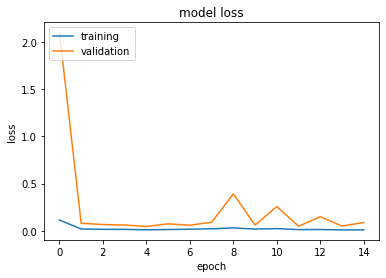

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [ ]:
# performing predictions
predictions2 = model2.predict(X_test) 

# unscaling the predictions
predictions2 = scaler_y.inverse_transform(np.array(predictions2).reshape((len(predictions2), 1)))

# printing the predictions
print('Predictions:')
predictions2

Predictions:


array([[710.1319 ],
       [695.11755],
       [707.49255],
       [708.32385],
       [704.4809 ],
       [704.07635],
       [704.2273 ],
       [694.326  ],
       [685.6536 ],
       [689.32776],
       [690.05945],
       [675.1535 ],
       [671.76306],
       [673.7169 ],
       [677.93634],
       [678.5279 ],
       [667.79535],
       [655.2413 ],
       [636.3953 ],
       [622.75836],
       [619.93726],
       [609.5781 ],
       [604.914  ],
       [599.0893 ],
       [600.96185],
       [600.46014],
       [608.89166],
       [611.2921 ],
       [618.4279 ],
       [622.7545 ],
       [622.35266],
       [616.28015],
       [608.0001 ],
       [599.48456],
       [602.3278 ],
       [603.79443],
       [604.5851 ],
       [601.6674 ],
       [605.87415],
       [605.766  ],
       [607.5696 ],
       [602.7613 ],
       [604.6105 ],
       [609.1337 ],
       [612.7963 ],
       [614.1628 ],
       [617.96783],
       [634.07263],
       [648.41406],
       [650.2151 ],


### GENERAL

In [ ]:
# re-reading the stock_data into pandas dataframe
stock_data = pd.read_csv('/content/drive/MyDrive/JU PROJ/TSLA FinBERT/GENERAL_FINBERT_Tesla_stock_data.csv', index_col = False)

# renaming the column
stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)
stock_data

,Date,Close,negative,neutral,positive,Open,High,Low,Volume
0,2017-01-03,43.397999,0.143946,0.211864,0.644191,42.972000,44.066002,42.192001,29616500
1,2017-01-04,45.397999,0.143946,0.211864,0.644191,42.950001,45.599998,42.862000,56067500
2,2017-01-05,45.349998,0.143946,0.211864,0.644191,45.284000,45.495998,44.389999,29558500
3,2017-01-06,45.801998,0.143946,0.211864,0.644191,45.386002,46.062000,45.090000,27639500
4,2017-01-09,46.256001,0.092892,0.182005,0.725102,45.793999,46.383999,45.599998,19897500
...,...,...,...,...,...,...,...,...,...
1341,2022-05-02,902.940002,0.106230,0.211320,0.682450,860.770020,906.359985,848.030029,25260500
1342,2022-05-03,909.250000,0.106230,0.211320,0.682450,903.179993,924.080017,888.590027,21236500
1343,2022-05-04,952.619995,0.106230,0.211320,0.682450,903.940002,955.500000,885.280029,27214600
1344,2022-05-05,873.280029,0.106230,0.211320,0.682450,939.020020,945.599976,857.700012,30839700


In [ ]:
for d in date:
  for i in range (0,1346):
    if d == stock_data.Date[i]:
      stock_data.positive[i] = np.nan
      stock_data.negative[i] = np.nan
      stock_data.neutral[i] = np.nan
stock_data

,Date,Close,negative,neutral,positive,Open,High,Low,Volume
0,2017-01-03,43.397999,0.143946,0.211864,0.644191,42.972000,44.066002,42.192001,29616500
1,2017-01-04,45.397999,0.143946,0.211864,0.644191,42.950001,45.599998,42.862000,56067500
2,2017-01-05,45.349998,0.143946,0.211864,0.644191,45.284000,45.495998,44.389999,29558500
3,2017-01-06,45.801998,NaN,NaN,NaN,45.386002,46.062000,45.090000,27639500
4,2017-01-09,46.256001,NaN,NaN,NaN,45.793999,46.383999,45.599998,19897500
...,...,...,...,...,...,...,...,...,...
1341,2022-05-02,902.940002,NaN,NaN,NaN,860.770020,906.359985,848.030029,25260500
1342,2022-05-03,909.250000,NaN,NaN,NaN,903.179993,924.080017,888.590027,21236500
1343,2022-05-04,952.619995,NaN,NaN,NaN,903.940002,955.500000,885.280029,27214600
1344,2022-05-05,873.280029,0.106230,0.211320,0.682450,939.020020,945.599976,857.700012,30839700


In [ ]:
# setting the column 'Date' as the index column
stock_data.set_index('Date', inplace=True)

# displaying the stock_data
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-01-03,43.397999,0.143946,0.211864,0.644191,42.972000,44.066002,42.192001,29616500
2017-01-04,45.397999,0.143946,0.211864,0.644191,42.950001,45.599998,42.862000,56067500
2017-01-05,45.349998,0.143946,0.211864,0.644191,45.284000,45.495998,44.389999,29558500
2017-01-06,45.801998,NaN,NaN,NaN,45.386002,46.062000,45.090000,27639500
2017-01-09,46.256001,NaN,NaN,NaN,45.793999,46.383999,45.599998,19897500
...,...,...,...,...,...,...,...,...
2022-05-02,902.940002,NaN,NaN,NaN,860.770020,906.359985,848.030029,25260500
2022-05-03,909.250000,NaN,NaN,NaN,903.179993,924.080017,888.590027,21236500
2022-05-04,952.619995,NaN,NaN,NaN,903.940002,955.500000,885.280029,27214600


In [ ]:
stock_data.shape

(1346, 8)

In [ ]:
stock_data.isna().any()

Close       False
negative     True
neutral      True
positive     True
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [ ]:
stock_data['negative'] = stock_data['negative'].interpolate(option='spline')
stock_data['positive'] = stock_data['positive'].interpolate(option='spline')
stock_data['neutral'] = stock_data['neutral'].interpolate(option='spline')
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-01-03,43.397999,0.143946,0.211864,0.644191,42.972000,44.066002,42.192001,29616500
2017-01-04,45.397999,0.143946,0.211864,0.644191,42.950001,45.599998,42.862000,56067500
2017-01-05,45.349998,0.143946,0.211864,0.644191,45.284000,45.495998,44.389999,29558500
2017-01-06,45.801998,0.193131,0.247722,0.559147,45.386002,46.062000,45.090000,27639500
2017-01-09,46.256001,0.242316,0.283581,0.474102,45.793999,46.383999,45.599998,19897500
...,...,...,...,...,...,...,...,...
2022-05-02,902.940002,0.106230,0.211320,0.682450,860.770020,906.359985,848.030029,25260500
2022-05-03,909.250000,0.106230,0.211320,0.682450,903.179993,924.080017,888.590027,21236500
2022-05-04,952.619995,0.106230,0.211320,0.682450,903.940002,955.500000,885.280029,27214600


In [ ]:
stock_data.isna().any()

Close       False
negative    False
neutral     False
positive    False
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [ ]:
stock_data = stock_data.dropna()
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-01-03,43.397999,0.143946,0.211864,0.644191,42.972000,44.066002,42.192001,29616500
2017-01-04,45.397999,0.143946,0.211864,0.644191,42.950001,45.599998,42.862000,56067500
2017-01-05,45.349998,0.143946,0.211864,0.644191,45.284000,45.495998,44.389999,29558500
2017-01-06,45.801998,0.193131,0.247722,0.559147,45.386002,46.062000,45.090000,27639500
2017-01-09,46.256001,0.242316,0.283581,0.474102,45.793999,46.383999,45.599998,19897500
...,...,...,...,...,...,...,...,...
2022-05-02,902.940002,0.106230,0.211320,0.682450,860.770020,906.359985,848.030029,25260500
2022-05-03,909.250000,0.106230,0.211320,0.682450,903.179993,924.080017,888.590027,21236500
2022-05-04,952.619995,0.106230,0.211320,0.682450,903.940002,955.500000,885.280029,27214600


In [ ]:
stock_data.describe(include='all')

,Close,negative,neutral,positive,Open,High,Low,Volume
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1.346000e+03
mean,295.546675,0.138767,0.162215,0.699018,295.573306,302.247606,288.313605,4.351325e+07
std,336.618073,0.105560,0.124644,0.144030,336.945344,344.687318,328.204762,2.958215e+07
min,35.793999,0.008543,0.008163,0.013248,36.220001,37.335999,35.397999,9.800600e+06
25%,60.522501,0.069091,0.063726,0.626875,60.400002,61.504500,59.273000,2.458988e+07
50%,70.862000,0.110223,0.143844,0.714863,70.875000,71.915001,69.917000,3.421775e+07
75%,606.112503,0.166106,0.227762,0.791472,604.659988,621.204971,595.574982,5.067100e+07
max,1229.910034,0.943876,0.968130,0.950832,1234.410034,1243.489990,1217.000000,3.046940e+08


In [ ]:
stock_data= stock_data.astype({"Volume":'float'})

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 2017-01-03 to 2022-05-06
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     1346 non-null   float64
 1   negative  1346 non-null   float64
 2   neutral   1346 non-null   float64
 3   positive  1346 non-null   float64
 4   Open      1346 non-null   float64
 5   High      1346 non-null   float64
 6   Low       1346 non-null   float64
 7   Volume    1346 non-null   float64
dtypes: float64(8)
memory usage: 94.6+ KB


In [ ]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 1076
Number of records in Test Data: 270


In [ ]:
stock_data['Close_EWMA3'] = stock_data['Close'].ewm(span=3, adjust=False).mean()
stock_data['Close_EWMA7'] = stock_data['Close'].ewm(span=7, adjust=False).mean()
stock_data['Close_EWMA14'] = stock_data['Close'].ewm(span=14, adjust=False).mean()
stock_data['Close_EWMA30'] = stock_data['Close'].ewm(span=30, adjust=False).mean()

stock_data['pos_EWMA3'] = stock_data['positive'].ewm(span=3, adjust=False).mean()
stock_data['pos_EWMA7'] = stock_data['positive'].ewm(span=7, adjust=False).mean()
stock_data['pos_EWMA14'] = stock_data['positive'].ewm(span=14, adjust=False).mean()
stock_data['pos_EWMA30'] = stock_data['positive'].ewm(span=30, adjust=False).mean()

stock_data['neu_EWMA3'] = stock_data['neutral'].ewm(span=3, adjust=False).mean()
stock_data['neu_EWMA7'] = stock_data['neutral'].ewm(span=7, adjust=False).mean()
stock_data['neu_EWMA14'] = stock_data['neutral'].ewm(span=14, adjust=False).mean()
stock_data['neu_EWMA30'] = stock_data['neutral'].ewm(span=30, adjust=False).mean()

stock_data['neg_EWMA3'] = stock_data['negative'].ewm(span=3, adjust=False).mean()
stock_data['neg_EWMA7'] = stock_data['negative'].ewm(span=7, adjust=False).mean()
stock_data['neg_EWMA14'] = stock_data['negative'].ewm(span=14, adjust=False).mean()
stock_data['neg_EWMA30'] = stock_data['negative'].ewm(span=30, adjust=False).mean()


# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
close_price = stock_data.iloc[start:total_data,0] #close

negative = stock_data.iloc[start:total_data,1] #neg
neutral = stock_data.iloc[start:total_data,2] #neu
positive = stock_data.iloc[start:total_data,3] #pos
open_price = stock_data.iloc[start:total_data,4] #open
high = stock_data.iloc[start:total_data,5] #high
low = stock_data.iloc[start:total_data,6] #low
volume = stock_data.iloc[start:total_data,7] #volume

ewma3_close = stock_data.iloc[start:total_data,8]#exponentially moving average 3days
ewma7_close = stock_data.iloc[start:total_data,9]#exponentially moving average 7days
ewma14_close = stock_data.iloc[start:total_data,10]#exponentially moving average 14days
ewma30_close = stock_data.iloc[start:total_data,11]#exponentially moving average 30days

ewma3_pos = stock_data.iloc[start:total_data,12]#exponentially moving average 3days
ewma7_pos = stock_data.iloc[start:total_data,13]#exponentially moving average 7days
ewma14_pos = stock_data.iloc[start:total_data,14]#exponentially moving average 14days
ewma30_pos = stock_data.iloc[start:total_data,15]#exponentially moving average 30days

ewma3_neu = stock_data.iloc[start:total_data,16]#exponentially moving average 3days
ewma7_neu = stock_data.iloc[start:total_data,17]#exponentially moving average 7days
ewma14_neu = stock_data.iloc[start:total_data,18]#exponentially moving average 14days
ewma30_neu = stock_data.iloc[start:total_data,19]#exponentially moving average 30days

ewma3_neg = stock_data.iloc[start:total_data,20]#exponentially moving average 3days
ewma7_neg = stock_data.iloc[start:total_data,21]#exponentially moving average 7days
ewma14_neg = stock_data.iloc[start:total_data,22]#exponentially moving average 14days
ewma30_neg = stock_data.iloc[start:total_data,23]#exponentially moving average 30days

In [ ]:
# printing close price
print("Close Price:")
close_price

Close Price:


Date
2017-01-04     45.397999
2017-01-05     45.349998
2017-01-06     45.801998
2017-01-09     46.256001
2017-01-10     45.973999
                 ...    
2022-05-02    902.940002
2022-05-03    909.250000
2022-05-04    952.619995
2022-05-05    873.280029
2022-05-06    865.650024
Name: Close, Length: 1345, dtype: float64

In [ ]:
# shifting next day close
close_price_shifted = close_price.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price,
                  ewma3_close,
                  ewma7_close,
                  ewma14_close,
                  ewma30_close, 
                  close_price_shifted, 

                  positive,
                  ewma3_pos,
                  ewma7_pos,
                  ewma14_pos,
                  ewma30_pos, 

                  negative,
                  ewma3_neg,
                  ewma7_neg,
                  ewma14_neg,
                  ewma30_neg,

                  neutral,
                  ewma3_neu,
                  ewma7_neu,
                  ewma14_neu,
                  ewma30_neu, 

                  volume, 
                  open_price, 
                  high, 
                  low], 
                 axis=1)
data.columns = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,45.397999,44.397999,43.897999,43.664665,43.527031,45.349998,0.644191,0.644191,0.644191,0.644191,...,0.143946,0.211864,0.211864,0.211864,0.211864,0.211864,56067500.0,42.950001,45.599998,42.862000
2017-01-05,45.349998,44.873999,44.260999,43.889377,43.644642,45.801998,0.644191,0.644191,0.644191,0.644191,...,0.143946,0.211864,0.211864,0.211864,0.211864,0.211864,29558500.0,45.284000,45.495998,44.389999
2017-01-06,45.801998,45.337998,44.646249,44.144393,43.783826,46.256001,0.559147,0.601669,0.622930,0.632852,...,0.147119,0.247722,0.229793,0.220828,0.216645,0.214177,27639500.0,45.386002,46.062000,45.090000
2017-01-09,46.256001,45.796999,45.048687,44.425940,43.943321,45.973999,0.474102,0.537885,0.585723,0.611685,...,0.153261,0.283581,0.256687,0.236517,0.225570,0.218655,19897500.0,45.793999,46.383999,45.599998
2017-01-10,45.973999,45.885499,45.280015,44.632348,44.074333,45.945999,0.389058,0.463472,0.536557,0.582001,...,0.162179,0.319440,0.288064,0.257248,0.238086,0.225157,18300000.0,46.400002,46.400002,45.377998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,902.940002,892.608051,913.037741,944.743648,961.509550,909.250000,0.682450,0.684026,0.701204,0.723374,...,0.105660,0.211320,0.208769,0.184878,0.162710,0.162399,25260500.0,860.770020,906.359985,848.030029
2022-05-03,909.250000,900.929025,912.090806,940.011162,958.137966,952.619995,0.682450,0.683238,0.696516,0.717918,...,0.105697,0.211320,0.210045,0.191488,0.169191,0.165555,21236500.0,903.179993,924.080017,888.590027
2022-05-04,952.619995,926.774510,922.223103,941.692339,957.781968,873.280029,0.682450,0.682844,0.692999,0.713189,...,0.105731,0.211320,0.210682,0.196446,0.174809,0.168508,27214600.0,903.940002,955.500000,885.280029


In [ ]:
data = data.dropna()    
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,45.397999,44.397999,43.897999,43.664665,43.527031,45.349998,0.644191,0.644191,0.644191,0.644191,...,0.143946,0.211864,0.211864,0.211864,0.211864,0.211864,56067500.0,42.950001,45.599998,42.862000
2017-01-05,45.349998,44.873999,44.260999,43.889377,43.644642,45.801998,0.644191,0.644191,0.644191,0.644191,...,0.143946,0.211864,0.211864,0.211864,0.211864,0.211864,29558500.0,45.284000,45.495998,44.389999
2017-01-06,45.801998,45.337998,44.646249,44.144393,43.783826,46.256001,0.559147,0.601669,0.622930,0.632852,...,0.147119,0.247722,0.229793,0.220828,0.216645,0.214177,27639500.0,45.386002,46.062000,45.090000
2017-01-09,46.256001,45.796999,45.048687,44.425940,43.943321,45.973999,0.474102,0.537885,0.585723,0.611685,...,0.153261,0.283581,0.256687,0.236517,0.225570,0.218655,19897500.0,45.793999,46.383999,45.599998
2017-01-10,45.973999,45.885499,45.280015,44.632348,44.074333,45.945999,0.389058,0.463472,0.536557,0.582001,...,0.162179,0.319440,0.288064,0.257248,0.238086,0.225157,18300000.0,46.400002,46.400002,45.377998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,870.760010,882.276100,916.403654,951.174978,965.548829,902.940002,0.682450,0.685603,0.707456,0.729670,...,0.105621,0.211320,0.206218,0.176064,0.155231,0.159025,29377700.0,902.250000,934.400024,870.000000
2022-05-02,902.940002,892.608051,913.037741,944.743648,961.509550,909.250000,0.682450,0.684026,0.701204,0.723374,...,0.105660,0.211320,0.208769,0.184878,0.162710,0.162399,25260500.0,860.770020,906.359985,848.030029
2022-05-03,909.250000,900.929025,912.090806,940.011162,958.137966,952.619995,0.682450,0.683238,0.696516,0.717918,...,0.105697,0.211320,0.210045,0.191488,0.169191,0.165555,21236500.0,903.179993,924.080017,888.590027


In [ ]:
# setting the target variable as the shifted close_price
y = data['close_price_shifted']
y

Date
2017-01-04     45.349998
2017-01-05     45.801998
2017-01-06     46.256001
2017-01-09     45.973999
2017-01-10     45.945999
                 ...    
2022-04-29    902.940002
2022-05-02    909.250000
2022-05-03    952.619995
2022-05-04    873.280029
2022-05-05    865.650024
Name: close_price_shifted, Length: 1344, dtype: float64

In [ ]:
# setting the features dataset for prediction  
cols = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
x = data[cols]
x

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,45.397999,44.397999,43.897999,43.664665,43.527031,45.349998,0.644191,0.644191,0.644191,0.644191,...,0.143946,0.211864,0.211864,0.211864,0.211864,0.211864,56067500.0,42.950001,45.599998,42.862000
2017-01-05,45.349998,44.873999,44.260999,43.889377,43.644642,45.801998,0.644191,0.644191,0.644191,0.644191,...,0.143946,0.211864,0.211864,0.211864,0.211864,0.211864,29558500.0,45.284000,45.495998,44.389999
2017-01-06,45.801998,45.337998,44.646249,44.144393,43.783826,46.256001,0.559147,0.601669,0.622930,0.632852,...,0.147119,0.247722,0.229793,0.220828,0.216645,0.214177,27639500.0,45.386002,46.062000,45.090000
2017-01-09,46.256001,45.796999,45.048687,44.425940,43.943321,45.973999,0.474102,0.537885,0.585723,0.611685,...,0.153261,0.283581,0.256687,0.236517,0.225570,0.218655,19897500.0,45.793999,46.383999,45.599998
2017-01-10,45.973999,45.885499,45.280015,44.632348,44.074333,45.945999,0.389058,0.463472,0.536557,0.582001,...,0.162179,0.319440,0.288064,0.257248,0.238086,0.225157,18300000.0,46.400002,46.400002,45.377998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,870.760010,882.276100,916.403654,951.174978,965.548829,902.940002,0.682450,0.685603,0.707456,0.729670,...,0.105621,0.211320,0.206218,0.176064,0.155231,0.159025,29377700.0,902.250000,934.400024,870.000000
2022-05-02,902.940002,892.608051,913.037741,944.743648,961.509550,909.250000,0.682450,0.684026,0.701204,0.723374,...,0.105660,0.211320,0.208769,0.184878,0.162710,0.162399,25260500.0,860.770020,906.359985,848.030029
2022-05-03,909.250000,900.929025,912.090806,940.011162,958.137966,952.619995,0.682450,0.683238,0.696516,0.717918,...,0.105697,0.211320,0.210045,0.191488,0.169191,0.165555,21236500.0,903.179993,924.080017,888.590027


In [ ]:
from sklearn.preprocessing import StandardScaler
# scaling the feature dataset

scaler_x = preprocessing.StandardScaler ()
x = np.array(x).reshape((len(x) ,len(cols)))

# scaling the target variable
scaler_y = preprocessing.StandardScaler ()
y = np.array (y).reshape ((len( y), 1))

# displaying the scaled feature dataset and the target variable
x, y

(array([[ 45.39799881,  44.39799881,  43.89799881, ...,  42.95000076,
          45.59999847,  42.86199951],
        [ 45.34999847,  44.87399864,  44.26099873, ...,  45.2840004 ,
          45.49599838,  44.38999939],
        [ 45.80199814,  45.33799839,  44.64624858, ...,  45.38600159,
          46.06200027,  45.09000015],
        ...,
        [909.25      , 900.92902549, 912.09080573, ..., 903.17999268,
         924.08001709, 888.59002686],
        [952.61999512, 926.7745103 , 922.22310307, ..., 903.94000244,
         955.5       , 885.2800293 ],
        [873.2800293 , 900.0272698 , 909.98733463, ..., 939.02001953,
         945.59997559, 857.70001221]]), array([[ 45.34999847],
        [ 45.80199814],
        [ 46.25600052],
        ...,
        [952.61999512],
        [873.2800293 ],
        [865.65002441]]))

In [ ]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (1076, 25) and y: (1076, 1)
Number of rows and columns in the Test set X: (267, 25) and y: (267, 1)


In [ ]:
sc = scaler_x.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

sc = scaler_y.fit(y_train)
y_train = sc.transform(y_train)
y_test = sc.transform(y_test)

In [ ]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (1076, 25, 1)
Shape of Test set X: (267, 25, 1)


### MODEL

In [ ]:
# setting the seed to achieve consistent and less random predictions at each execution
import tensorflow as tf
import random 
import os
# setting the seed to achieve consistent and less random predictions at each execution
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
initializer = tf.keras.initializers.GlorotNormal()
# setting the model architecture
model1=Sequential()
model1.add((GRU(250,return_sequences=True,activation='tanh',kernel_initializer=initializer,input_shape=(len(cols),1))))
model1.add(Dropout(0.4))
model1.add((GRU(200,return_sequences=True,activation='tanh')))
model1.add(Dropout(0.4))
model1.add((GRU(150,activation='tanh', return_sequences=True)))
model1.add(Dropout(0.4))
model1.add(Flatten())
model1.add(Dense(1, activation = 'linear'))

# printing the model summary
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_9 (GRU)                 (None, 25, 250)           189750    
                                                                 
 dropout_9 (Dropout)         (None, 25, 250)           0         
                                                                 
 gru_10 (GRU)                (None, 25, 200)           271200    
                                                                 
 dropout_10 (Dropout)        (None, 25, 200)           0         
                                                                 
 gru_11 (GRU)                (None, 25, 150)           158400    
                                                                 
 dropout_11 (Dropout)        (None, 25, 150)           0         
                                                                 
 flatten_3 (Flatten)         (None, 3750)             

In [ ]:
import tensorflow as tf
model1.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

history = model1.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=250,
    batch_size=16,
    callbacks=callbacks,
    shuffle = False
)

Epoch 1/250
61/61 [==============================] - 17s 177ms/step - loss: 0.1251 - val_loss: 2.0256
Epoch 2/250
61/61 [==============================] - 10s 158ms/step - loss: 0.0203 - val_loss: 0.0762
Epoch 3/250
61/61 [==============================] - 10s 157ms/step - loss: 0.0113 - val_loss: 0.0610
Epoch 4/250
61/61 [==============================] - 9s 152ms/step - loss: 0.0114 - val_loss: 0.0809
Epoch 5/250
61/61 [==============================] - 9s 149ms/step - loss: 0.0120 - val_loss: 0.0463
Epoch 6/250
61/61 [==============================] - 9s 154ms/step - loss: 0.0153 - val_loss: 0.1075
Epoch 7/250
61/61 [==============================] - 10s 157ms/step - loss: 0.0326 - val_loss: 0.3936
Epoch 8/250
61/61 [==============================] - 10s 158ms/step - loss: 0.0261 - val_loss: 0.0812
Epoch 9/250
61/61 [==============================] - 9s 153ms/step - loss: 0.0321 - val_loss: 0.4832
Epoch 10/250
61/61 [==============================] - 10s 161ms/step - loss: 0.0164 - 

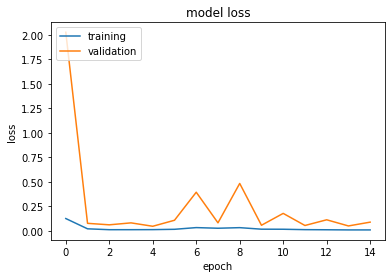

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [ ]:
# performing predictions
predictions1 = model1.predict(X_test) 

# unscaling the predictions
predictions1 = scaler_y.inverse_transform(np.array(predictions1).reshape((len(predictions1), 1)))

# printing the predictions
print('Predictions:')
predictions1

Predictions:


array([[706.5283 ],
       [705.57697],
       [706.96387],
       [709.454  ],
       [707.0803 ],
       [706.40814],
       [706.41797],
       [694.8442 ],
       [685.054  ],
       [681.73047],
       [686.95355],
       [677.0954 ],
       [671.00604],
       [665.3758 ],
       [663.1452 ],
       [658.07086],
       [644.7868 ],
       [634.22455],
       [616.9595 ],
       [611.0197 ],
       [607.2597 ],
       [601.16   ],
       [598.1855 ],
       [593.882  ],
       [596.5376 ],
       [597.0397 ],
       [605.54065],
       [607.488  ],
       [614.2109 ],
       [618.9149 ],
       [618.86066],
       [617.9277 ],
       [610.8326 ],
       [603.543  ],
       [606.53357],
       [608.362  ],
       [609.7401 ],
       [606.66486],
       [610.56354],
       [609.88464],
       [611.5941 ],
       [606.6193 ],
       [609.78986],
       [615.15106],
       [619.36725],
       [621.7776 ],
       [626.32776],
       [643.5243 ],
       [658.7044 ],
       [660.22943],


## Unscaling

In [ ]:
# unscaling the test feature dataset, x_test
# unscaling the test y dataset, y_test+
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

# Comparision

## Plotting

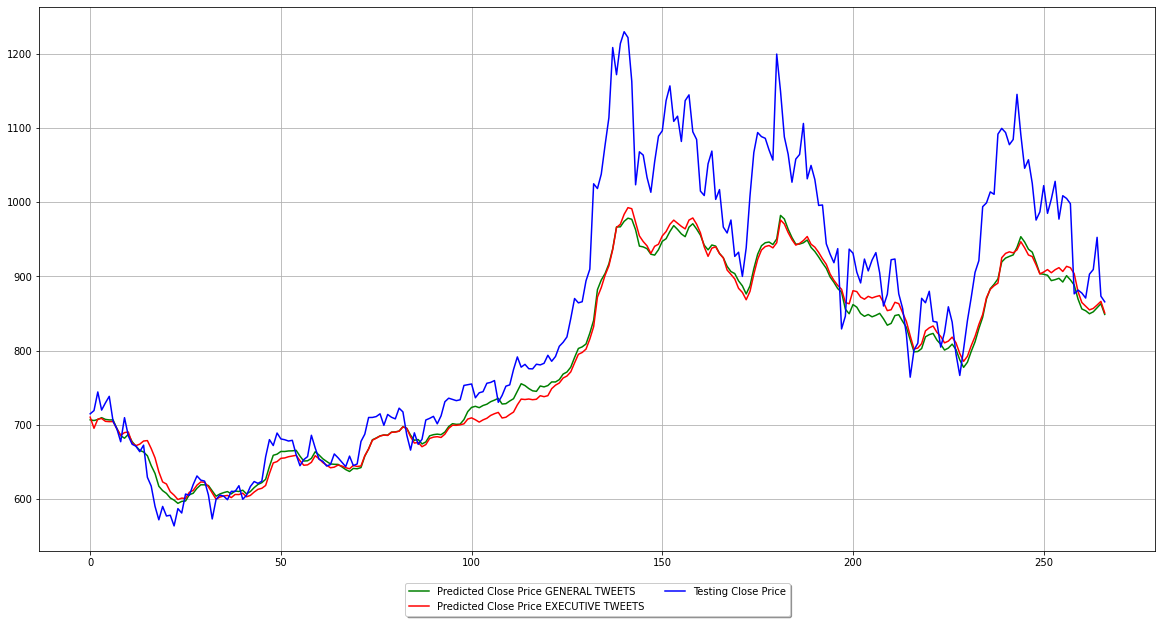

In [ ]:

plt.figure(figsize=(20,10))

# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(predictions1,'-g', label="Predicted Close Price GENERAL TWEETS")
plt.plot(predictions2,'-r', label="Predicted Close Price EXECUTIVE TWEETS")
plt.plot([row[0] for row in y_test],color = 'b', label="Testing Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error

print("MAE general",mean_absolute_error(y_test,predictions1))
print("MAE executive",mean_absolute_error(y_test,predictions2))

MAE general 59.621879206168074
MAE executive 60.155637133880504


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

MSE1 = np.square(np.subtract(y_test,predictions1)).mean() 
MSE2 = np.square(np.subtract(y_test,predictions2)).mean() 

print("MSE general",MSE1)
print("MSE executive",MSE2)

RMSE1 = MSE1
RMSE2 = MSE2

print('Root Mean Square Error General Tweets (sklearn.metrics) =', round(np.sqrt(RMSE1),4))
print('Root Mean Square Error Executive Tweets (sklearn.metrics) =', round(np.sqrt(RMSE2),4))

MSE general 7016.596421386586
MSE executive 6911.938924312801
Root Mean Square Error General Tweets (sklearn.metrics) = 83.7651
Root Mean Square Error Executive Tweets (sklearn.metrics) = 83.1381


In [ ]:
from sklearn.metrics import r2_score
r2 =[ r2_score(y_test,predictions1), r2_score(y_test,predictions2)]
print('R2 general',r2[0])
print('R2 executive',r2[1])

R2 general 0.7684933359557511
R2 executive 0.7719464215487778


In [ ]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
    
print("MAPE General",MAPE(y_test,predictions1), "%")
print("MAPE Executive",MAPE(y_test,predictions2), "%")

MAPE General 6.174206202820947 %
MAPE Executive 6.315681510588346 %


# Conclusion

General is better

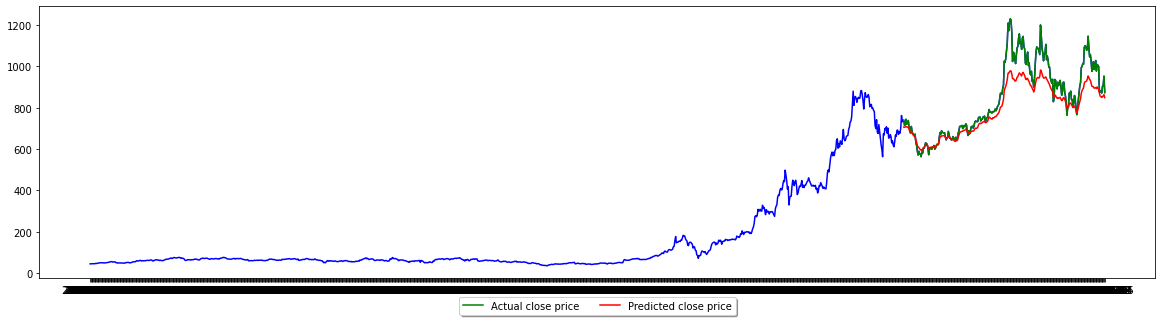

In [ ]:
val = data[len(y_train)+1:]
val['pred'] = predictions1
plt.figure(figsize = (20,5))
plt.plot(data['close_price'], color = 'b')
plt.plot(val['close_price'], label = 'Actual close price', color = 'g')
plt.plot(val['pred'], label = 'Predicted close price', color = 'r')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()